# Parte 1 - Preprocesado de los datos


**Usaremos datos en Bolsa de Google. Para ello entrenaremos con datos desde 2012 hasta 2016 y testearemos con los datos del mes de enero de 2017 para ver si funciona.**

In [1]:
# Importación de las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Importar el dataset de entrenamiento de las acciones de Google desde 2012 hasta 2016
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set  = dataset_train.iloc[:, 1:2].values #pillamos Open (ponemos 1:2 en vez de 1 para que lo pille en fomra de columna en vez de vector)
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
# Escalado de características (normalizamos los datos 0,1)
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Crear una estructura de datos con 60 timesteps y 1 salida

# Los 60 timesteps indica que la RNR será capaz de mirar 60 precios atrás(1 trimestre), 
# 60 precios antes del día actual.

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [5]:
# Redimensión de los datos
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Parte 2 - Construcción de la RNR

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [7]:
# Inicialización del modelo
regressor = Sequential()

In [8]:
# Añadir la primera capa de LSTM y la regulariación por Dropout
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

# Añadir la segunda capa de LSTM y la regulariación por Dropout
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

# Añadir la tercera capa de LSTM y la regulariación por Dropout
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

# Añadir la cuarta capa de LSTM y la regulariación por Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [9]:
# Añadir la capa de salida
regressor.add(Dense(units = 1))

In [10]:
# Compilar la RNR
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:

# Ajustar la RNR al conjunto de entrenamiento
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0031
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0033
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0028
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0029
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0029
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0031
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0031
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0029
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0028
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0029
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0027
Epoch 12/100
1198/1198 [==============================] - 9s 7ms/step - lo

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0011


# Parte 3 - Ajustar las predicciones y visualizar los resultados

In [15]:
# Obtener el valor de las acciones reales de Google de Enero de 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [16]:
# Obtener la predicción de la acción con la RNR para Enero de 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

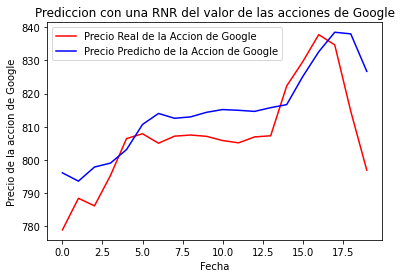

In [17]:
# Visualizar los Resultados
plt.plot(real_stock_price, color = 'red', label = 'Precio Real de la Accion de Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Precio Predicho de la Accion de Google')
plt.title("Prediccion con una RNR del valor de las acciones de Google")
plt.xlabel("Fecha")
plt.ylabel("Precio de la accion de Google")
plt.legend()
plt.show()